# 時系列解析入門

# **3. 時系列データの可視化 (45分)**

# <font color="DarkOrange">1. 時系列データの視覚的理解</font>
時系列データは、時間に沿って記録されたデータです。<br>
これらを視覚的に理解することで、トレンド（傾向）、季節性、周期性、ノイズなどを把握できます。

本章では以下を学びます：

1.   時系列プロット：データを時間軸に沿って描画し、傾向や変動を視覚化
2.   自己相関プロット：データ内の過去の値との関係を調べ、周期性やパターンを確認
2.   ラグプロット：現在の値と遅れた値（過去の値）の相関を確認し、データ構造を理解







## <font color="SeaGreen">1-a 時系列データの可視化手法</font>

### <u>時系列プロット</u>
**利用データ**<br>
以下は2章でも利用しました、Kaggleで公開されているAir Passengers Datasetです。本章でも同じデータを利用して講義を進めていきます。まずはデータを読み込んで可視化し、**データ全体の傾向と変動の様子**を把握しましょう。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


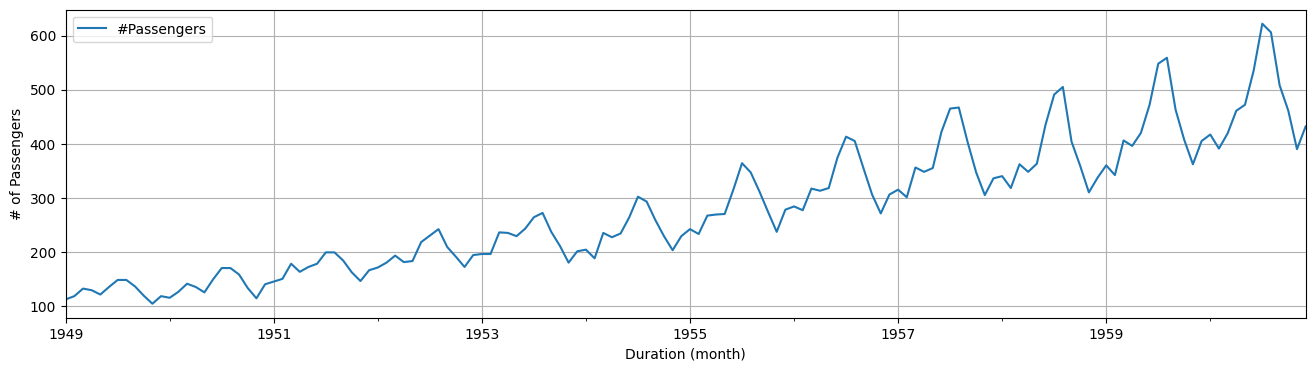

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/time_series/seminar/files/AirPassengers.csv',
                   index_col='Month',
                   date_parser=dateparse,
                   dtype='int')

data.plot(figsize=(16,4))
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.grid(True)

続いて、対数変換を行います。

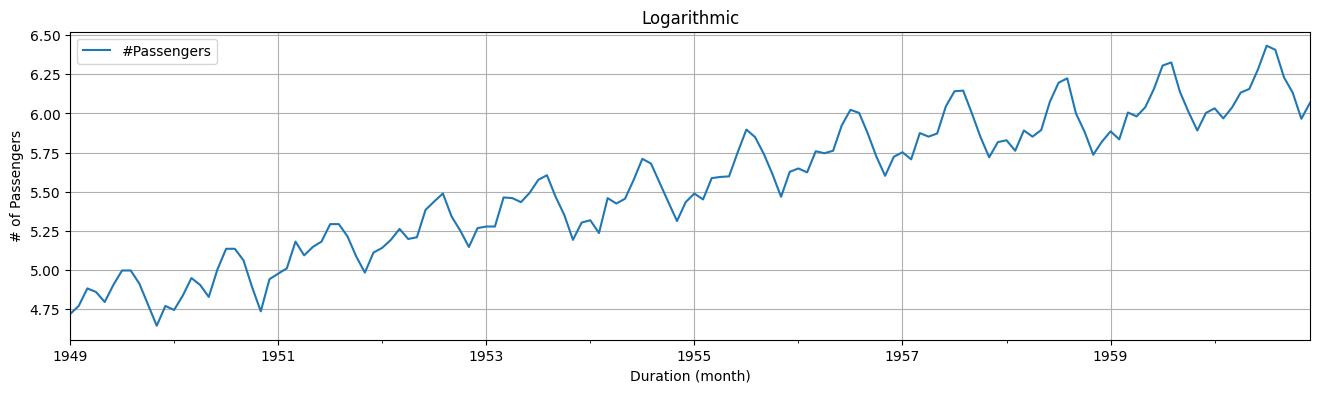

In [3]:
data_log = np.log(data)

data_log.plot(figsize=(16,4))
plt.title('Logarithmic')
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.grid(True)

### <u>自己相関プロット</u>

#### 自己相関とは
時系列データの特徴を捉えるための方法として、自己相関が挙げられます。自己相関とは、簡単にいうと、データが自身の過去の値とどの程度関連しているかを時間をずらして測るものです。
例えば、時系列データの値を1期、2期、3期……と順番にずらしながら相関係数を求めていきます。この「時間のずれ」を「ラグ」と呼びます。

- ラグ1：データを1期ずらしたときの相関
- ラグ2：データを2期ずらしたときの相関
- ラグ3：データを3期ずらしたときの相関

このようにラグごとに相関係数を計算することで、データの周期性を検出することができます。


その際、<font color="red">一般的な手法としては、トレンドを除去した時系列データに対して自己相関分析を行い、周期性を検出します。</font>
トレンド（長期的な増減傾向）があると、データの平均や分散が時間とともに変化するため、自己相関分析の結果がトレンドによって歪められることがあります。
そのため、トレンドを除去することで、データの定常性を高め、自己相関に基づく周期性の検出が正確になります。

では、自己相関分析によりデータの周期性を検出してみましょう。
次の2つのパターンで実施していきます。

1. トレンドを除去しない場合：もとの時系列データのまま自己相関分析を実施します
1. トレンドを除去した場合：トレンド除去後の時系列データに対して自己相関分析を実施します

自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。
- 自己相関(ACF)プロット<br>
時系列データの過去の値との関係（自己相関）を調べるためのグラフです。
    - 縦軸（y軸）：
    自己相関の強さを表す（-1から1の範囲）。
    - 横軸（x軸）：
    ラグ（遅延）の数。ラグ1なら1つ前の値との関係、ラグ2なら2つ前の値との関係を表す。
    - 棒の高さ：
    そのラグでの自己相関の大きさを表す。
    - 薄い塗りつぶされた領域（信頼区間）：
    棒がこの範囲を超えている場合、そのラグの相関は**統計的に意味がある（有意）**と判断できる。

    例）季節性のあるデータ（1年周期のデータ）をACFプロットで調べると、12ヶ月ごとに高い自己相関のピークが現れることがあります。これで「12ヶ月周期」があることを確認できます。

- 偏自己相関(PACF)プロット<br>
時系列データの直接的な影響を調べるためのグラフです。他の遅れ（ラグ）の影響を取り除いた場合に、特定のラグが現在の値にどれくらい影響しているかを示します。

    例）もしデータがラグ1とラグ2の値に影響されている場合、PACFプロットではラグ1とラグ2に大きな棒が現れるかもしれません。しかし、ラグ3以降では棒が小さくなることがあります。これにより、データの直接的な関係が短期的（ラグ1やラグ2）で終わっていると判断できます。


1. トレンドを除去しない場合<br>
もとの時系列データのまま自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。

In [4]:
from statsmodels.tsa import stattools as tsat
import statsmodels.graphics.tsaplots as tsap
from statsmodels.tsa.seasonal import STL

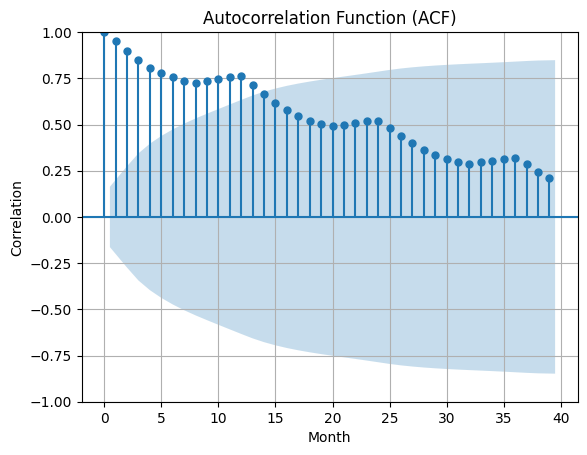

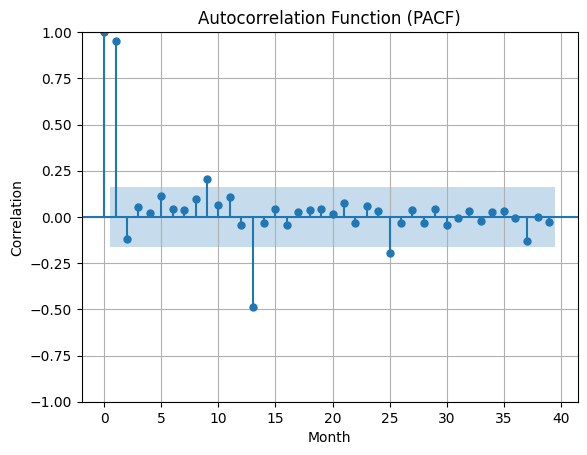

In [5]:
fig = tsap.plot_acf(data_log, lags=range(40))
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

fig = tsap.plot_pacf(data_log, lags=range(40))
plt.title('Autocorrelation Function (PACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

なんとなく12ヶ月ごとの相関が見てとれますが自明ではありませんね。もっとも高い自己相関値を持つのは、同じ時刻を除いて直近一ヶ月となっています。これは乗客数の上昇トレンドによるもので、今回扱うデータを自己相関のみで予測するのは難しそうです。

2. トレンドを除去した場合<br>
トレンド除去後の時系列データに対して自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。

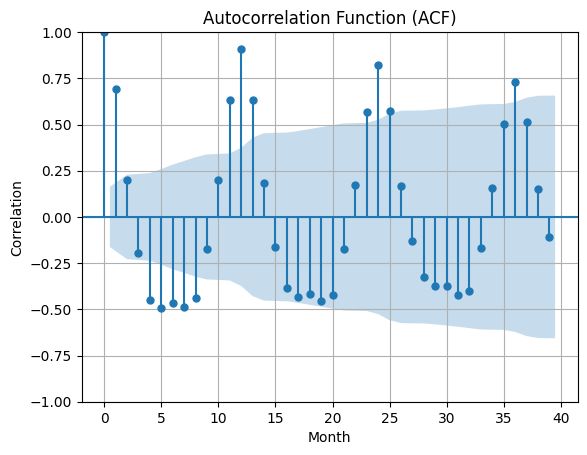

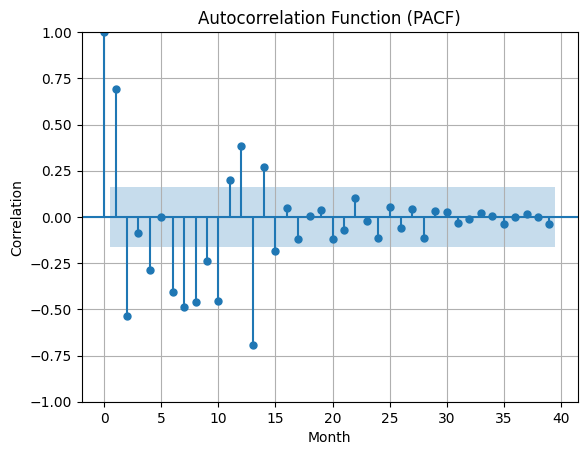

In [6]:
stl=STL(data_log, robust=True)
stl_series = stl.fit()

fig = tsap.plot_acf(stl_series.seasonal, lags=range(40))
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

fig = tsap.plot_pacf(stl_series.seasonal, lags=range(40))
plt.title('Autocorrelation Function (PACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

ACFプロットを見ると、ラグ12、24、36、…といった位置で自己相関が高い値を示していることがわかります。ラグ12ごとに相関が高いので、12周期の季節性が存在する可能性があります。<br>
※もっとも高い自己相関値を持つのは、同じ時刻を除いて直近一ヶ月となっています。これは乗客数の上昇トレンドによるものと考えられます。<br>
一方で、PACFプロットを見ると、ラグ12で偏自己相関が高いことがわかります。一方、ラグ24や36では偏自己相関が小さい、あるいは有意ではない場合があります。<br>
ラグ12でのみ偏自己相関が高いため、データに直接的な影響を与える周期は12周期であり、それ以上のラグ（24、36など）は間接的な影響によるものと考えられます。結論として、データの季節性の周期は12周期である可能性が非常に高いと言えます。

以下、ACFとPACFの違いを簡単にまとめます。

| **項目** | **ACFプロット** | **PACFプロット** |
| :---: | :---: | :---: |
| 目的 | 全体の自己相関を見る | 他のラグの影響を取り除いた直接的な相関を見る |
| 影響を考慮するか  | 他のラグの影響も含めて計算 | 他のラグの影響を制御した相関のみを計算 |
| 使いどころ| データの周期性や全体的な関連性を把握 | ARモデルの次数（ラグ数）を選ぶ際に役立つ |



### <u>ラグプロット</u>
ラグプロットは、時系列データの現在の値と過去の値を散布図として描くプロットです。
ラグプロットを使うと、時系列データに自己相関（過去の値との関連性）があるかどうかを視覚的に確認できます。

#### ラグプロットの見方
- 線形のパターンが見られる場合（強い自己相関の存在）：<br>
現在の値と過去の値が直線的な関係を持つ場合、データに強い自己相関があることを示しています。これは、データが過去の値に大きく依存していることを意味します。

- ランダムな分布の場合（自己相関の欠如）：<br>
散布図が特定のパターンを持たず、点が無作為に配置されている場合、データに自己相関がほとんどないことを示しています。これは、データが過去の値に依存せず、ランダムな動きをしている可能性を示唆します。

- 周期的なパターンが見られる場合（季節性や周期性の存在）：<br>
特定のラグで周期的なパターンが現れる場合、データに季節性や周期的な変動が含まれている可能性があります。これは、一定の周期でデータが繰り返す傾向を持つことを示しています。


トレンドの影響を除去するために、差分を取ります。
トレンドが除去されると線形性が弱まり、データのランダム性や周期性がより明確に現れます。

ラグ1、ラグ6、ラグ12についてラグプロットを作成してみます。

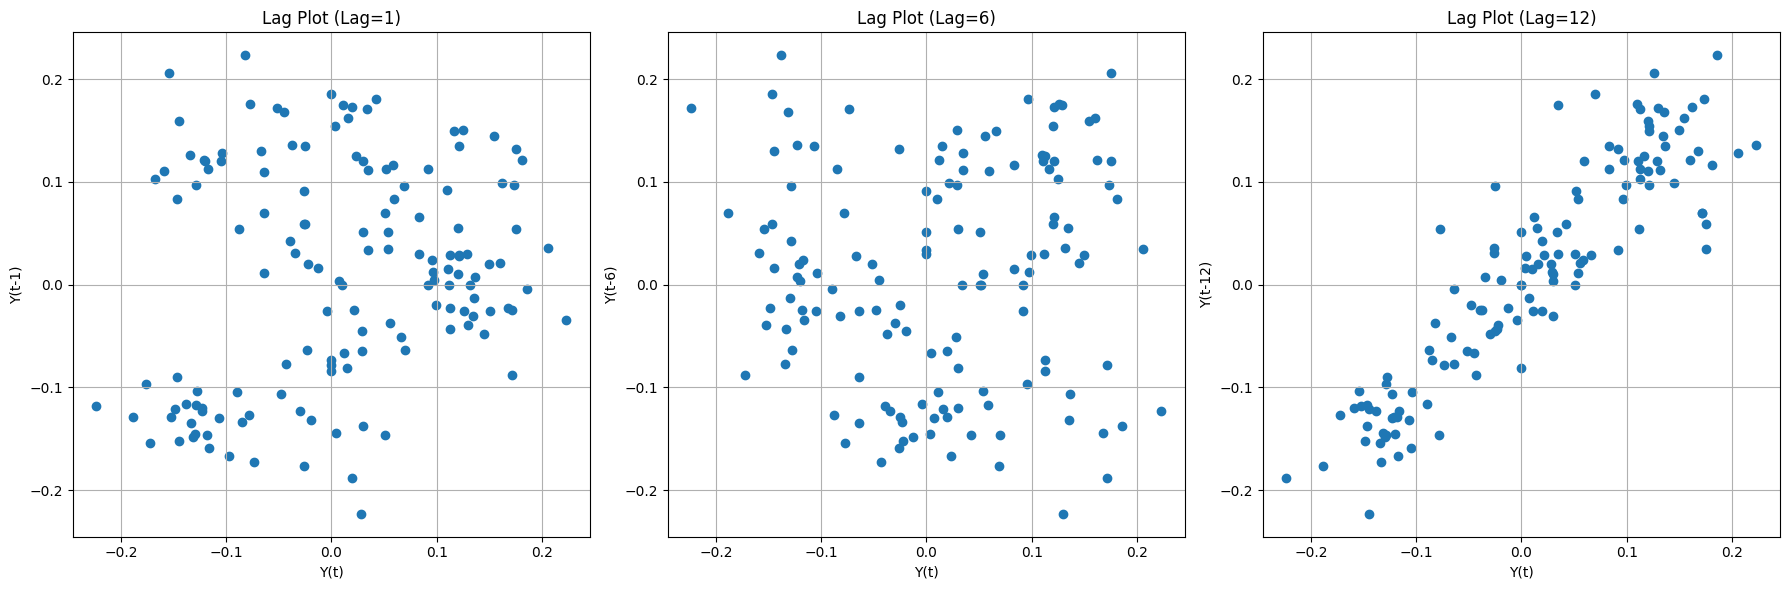

In [7]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# トレンドを除去（1階差分）
diff_data = data_log.diff(periods=1)

# 横並びに3つのラグプロットを描画
plt.figure(figsize=(18, 6))

# ラグ1のプロット
plt.subplot(1, 3, 1)  # 1行3列の1つ目
lag_plot(diff_data, lag=1)
plt.title("Lag Plot (Lag=1)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-1)")
plt.grid(True)

# ラグ6のプロット
plt.subplot(1, 3, 2)  # 1行3列の2つ目
lag_plot(diff_data, lag=6)
plt.title("Lag Plot (Lag=6)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-6)")
plt.grid(True)

# ラグ12のプロット
plt.subplot(1, 3, 3)  # 1行3列の3つ目
lag_plot(diff_data, lag=12)
plt.title("Lag Plot (Lag=12)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-12)")
plt.grid(True)

# レイアウト調整と表示
plt.tight_layout()
plt.show()


プロット結果から、ラグ12（12期間前の値）との間に強い正の相関がありそうです。これは、データに12周期の季節性が存在する可能性が高いことを示しています。

## <font color="SeaGreen">1-b トレンドと季節性のプロット</font>
時系列データのトレンド（長期的な変化）や季節性（周期的な変動）を可視化する方法 を学びます。トレンドはデータの長期的な傾向を示し、季節性は一定の周期で繰り返す変動を表します。データを適切に可視化することで、時系列データの構造を理解し、適切な予測や分析に活かすことができます。

第1章でご紹介した、気象庁が公開している「神奈川県横浜地区の2022年1月1日から2024年12月31日までの1日の平均気温の気象データ」を用いてトレンドと季節性の可視化を行います。

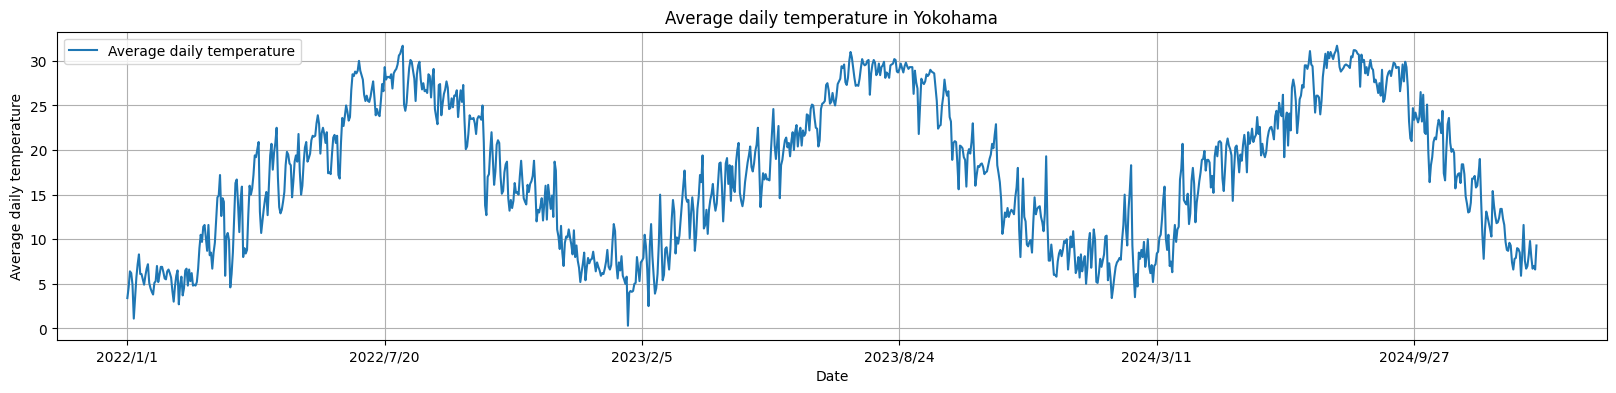

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

# データのロード
dateparse = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
data = pd.read_csv('/content/drive/MyDrive/time_series/seminar/files/average_daily_temperature_data.csv',
                   index_col='Date',
                   date_format=dateparse,
                   dtype='float')

# プロット
data.plot(figsize=(20,4))
plt.title('Average daily temperature in Yokohama')
plt.xlabel('Date')
plt.ylabel('Average daily temperature')
plt.grid(True)
plt.show()

### **トレンドの可視化**
- 移動平均（Rolling Mean）<br>
データの短期的な変動を抑えて、滑らかな長期的な傾向 を確認する方法です。

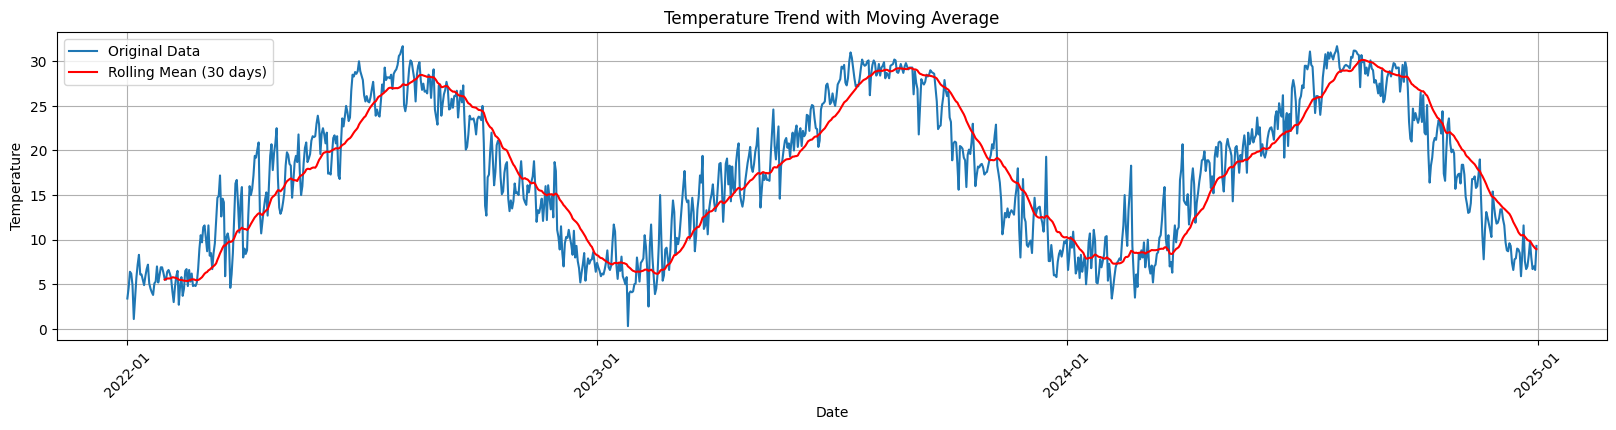

In [23]:
# 移動平均を使ったトレンドの可視化
import matplotlib.dates as mdates

plt.figure(figsize=(20, 4))
plt.plot(data.index, data.iloc[:, 0], label='Original Data')
plt.plot(data.index, data['rolling_mean'], label='Rolling Mean (30 days)', color='red')

# x軸のフォーマットを調整
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # 年ごとにラベルを表示
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # "YYYY-MM" 表示に変更
plt.xticks(rotation=45)  # x軸ラベルを回転させて読みやすく

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trend with Moving Average")
plt.legend()
plt.grid(True)
plt.show()

### **季節性の可視化**
- ボックスプロット<br>
ボックスプロットを用いた季節性の分析では、時系列データの季節ごとの特徴 を明確に把握できます。特に、月ごとの気温の分布を比較することで、年間の気温変動のパターン を確認できます。各月の中央値を比較すると、最も気温が高い月・低い月がわかり、ボックス（四分位範囲）の広さを確認することで、月ごとの気温変動の大きさも分析できます。 また、外れ値を確認することで、異常気象による極端な高温・低温の日が存在するかを見つけることができます。<br>
この分析を通じて、季節ごとの気温の変化や異常気象の影響を視覚的に理解し、予測モデルの設計や気候変動の分析に役立てることができます。

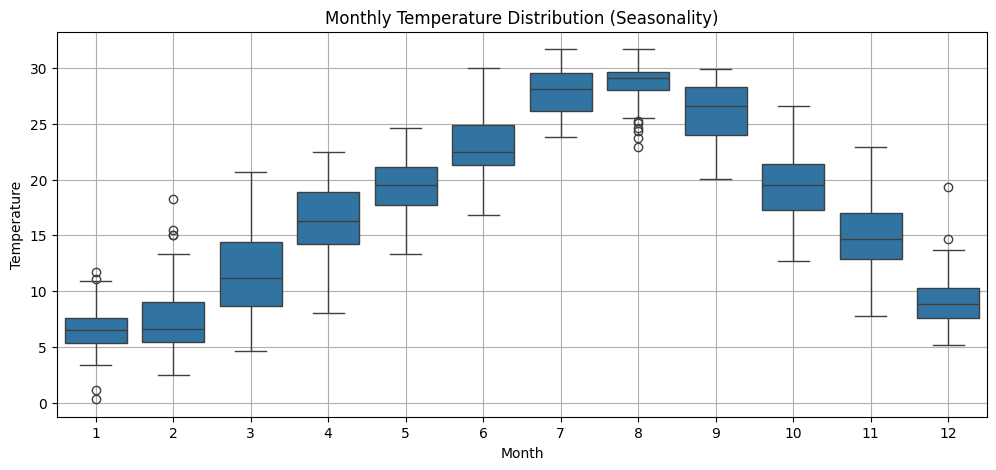

In [18]:
import seaborn as sns

# データのインデックスを DateTime に変換（念のため再設定）
data.index = pd.to_datetime(data.index)

# ボックスプロットで季節性の確認（月ごとの気温の分布）
data['Month'] = data.index.month

plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Month'], y=data.iloc[:, 0])
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Monthly Temperature Distribution (Seasonality)")
plt.grid(True)
plt.show()

- 自己相関プロット（Autocorrelation）<br>
自己相関を使った季節性の分析では、時系列データの中にどの程度の周期性があるかを数値的・視覚的に確認する ことができます。特定の周期で自己相関が高い場合、そのデータには周期的なパターンがあることを意味します。<br>
例えば、気温データでは1年間（365日）周期の自己相関が高くなり、売上データでは1週間（7日）ごとの自己相関が高くなることが多い です。自己相関プロットを見ることで、データの周期がどのくらい安定しているかや、どの周期が最も強く影響しているかを特定できます。<br>
この分析を活用することで、季節性のあるデータをより適切にモデル化し、予測精度を向上させる ことが可能になります。

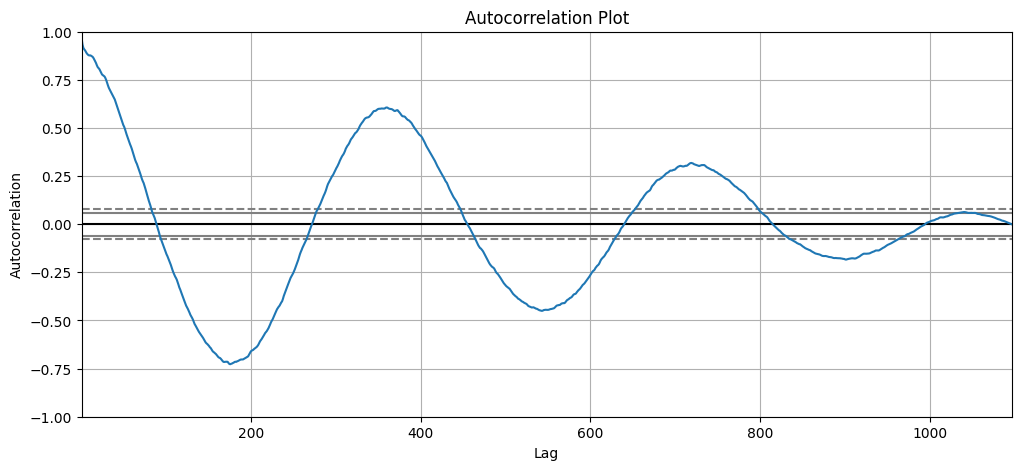

In [20]:
from pandas.plotting import autocorrelation_plot

# 自己相関プロット（周期性を確認）
plt.figure(figsize=(12, 5))
autocorrelation_plot(data.iloc[:, 0])
plt.title("Autocorrelation Plot")
plt.show()

自己相関プロットを見ると、データには約365日周期の季節性が存在していることがわかります。これは、毎年同じ時期に似た気温の変動が繰り返されることを意味します。

さらに、約180日前後のラグで負の相関が強くなっていることから、夏と冬の気温が逆の関係にある ことがわかります。このような情報をもとに、予測モデルに季節性を組み込むと、より精度の高い予測が可能になります。

### **時系列データの分解（seasonal_decompose）**
時系列データは、トレンド（Trend）、季節性（Seasonality）、残差（Residual） の3つの要素によって構成されています。
seasonal_decompose を使うことで、時系列データをこれらの成分に分解し、それぞれの影響を個別に分析できます。

トレンド では、データが長期的に上昇・下降しているかを確認でき、季節性 を見ることで、定期的なパターンを特定できます。さらに、残差 を分析することで、データに含まれるランダムな要因を把握し、異常値や説明できない変動を特定できます。

この分析を活用することで、データのパターンを明確にし、より適切な時系列予測を行うことができます。



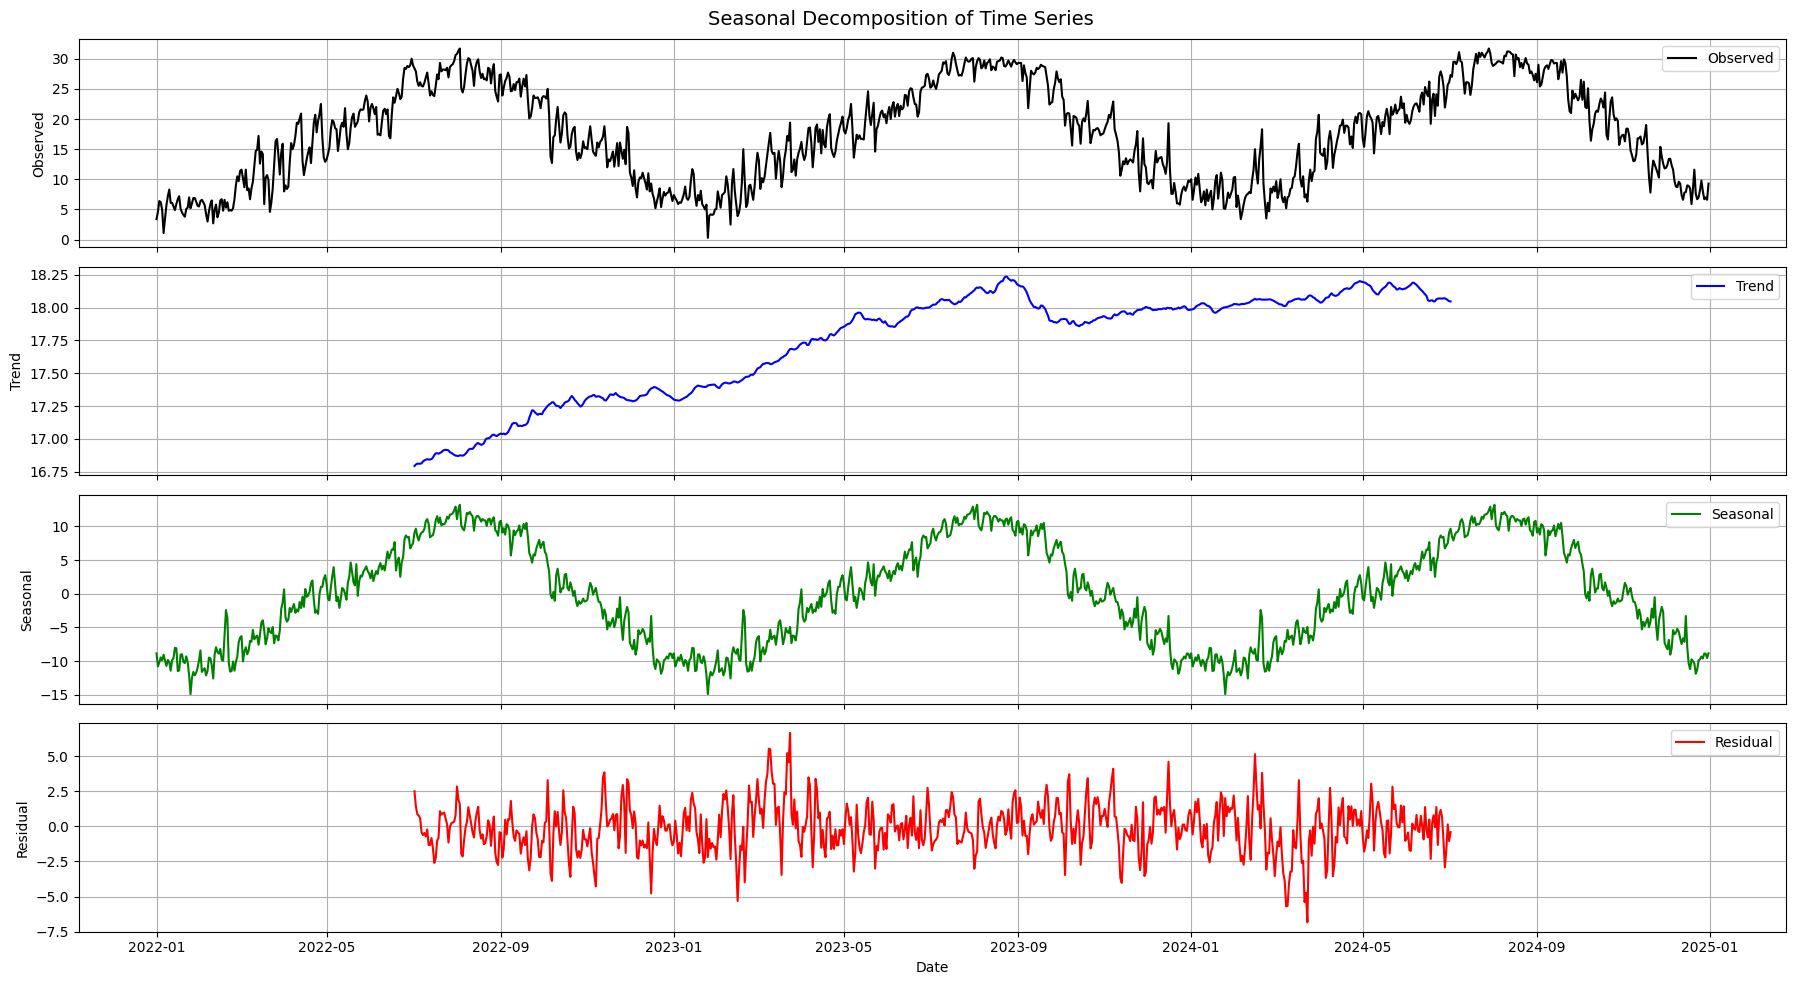

In [27]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 時系列データの分解（トレンド・季節性・残差の分離）
result = seasonal_decompose(data.iloc[:, 0], model='additive', period=365)

# プロットのサイズを調整
fig, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True)

# 各成分をプロット
axes[0].plot(result.observed, label="Observed", color='black')
axes[0].set_ylabel("Observed")
axes[0].legend(loc='upper right')
axes[0].grid(True)

axes[1].plot(result.trend, label="Trend", color='blue')
axes[1].set_ylabel("Trend")
axes[1].legend(loc='upper right')
axes[1].grid(True)

axes[2].plot(result.seasonal, label="Seasonal", color='green')
axes[2].set_ylabel("Seasonal")
axes[2].legend(loc='upper right')
axes[2].grid(True)

axes[3].plot(result.resid, label="Residual", color='red')
axes[3].set_ylabel("Residual")
axes[3].legend(loc='upper right')
axes[3].grid(True)

# x軸ラベルと全体のタイトルを設定
axes[3].set_xlabel("Date")
fig.suptitle("Seasonal Decomposition of Time Series", fontsize=14)

# レイアウト調整
plt.tight_layout()
plt.show()


- トレンド（Trend）<br>
    - 特徴: <br>
    長期的な変動を示している（青線）。
    - 解釈:<br>
    トレンドラインがゆるやかに上昇している時期があり、その後横ばい。<br>
    - 考察:<br>
    地球温暖化の影響で気温が徐々に上がっている？
    都市化や環境の変化の影響？

- 季節性（Seasonal）<br>
    - 特徴: 一定の周期で繰り返すパターンを示している（緑線）。
    - 解釈:<br>
    1年を通じて明確な周期性 が見られる（夏に高温・冬に低温）。<br>
    この周期性が毎年同じパターンで繰り返されている ため、季節変動が強く表れている。
    - 考察:<br>
    気温データのように、年単位で繰り返す性質があるデータでは季節性の影響が大きい。
    夏と冬で明確な差があるため、予測モデルに季節性を組み込むことで精度を上げられる。

- 残差（Residual）<br>
    - 特徴: トレンドと季節性を除いた後に残るノイズ成分（赤線）。
    - 解釈:<br>
    ある程度ランダムな変動が見られるが、完全なランダムではなく、局所的に変動が大きくなる箇所がある。<br>
    特定の時期で変動が激しくなっている可能性あり。
    - 考察:<br>
    異常気象（猛暑・寒波）が影響？ → 残差の大きな変動がある期間を特定し、異常気象の記録と比較すると良い。<br>
    その他の要因（例えばエルニーニョ現象など）が影響？ → 気象データと突き合わせると、予測モデルの改善につながる。


### **まとめ**
このデータは、明確な季節性を持つ典型的な時系列データ であり、1年周期で気温が規則的に変動している ことが確認できます。

また、長期的なトレンドには緩やかな上昇傾向が見られ、気候変動や都市化などの環境要因が影響を及ぼしている可能性があります。この傾向が一時的なものか、より構造的な変化であるかを判断するためには、より長期間のデータ分析が必要となります。

さらに、残差（ノイズ）に完全なランダム性は見られず、一部の時期に大きな変動が発生していることから、異常気象や突発的な気候変動の影響を受けている可能性が高いと言えます。

これらの異常変動の要因を特定し、モデルに適切な補正を加えることで、より信頼性の高い予測が実現できると考えられる。